In [1]:
#data processing
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning and data anlysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
#loading the datasets into pandas dataframes
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
# Add label fake and true(adding a new column called target to each DataFrame)
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
#Concatenate dataframes into one
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
# Check the data(shows first 5 rows)
data.head()

,title,text,subject,date,target
0,Jill Stein Forced To Drop Pennsylvania Recoun...,"On Saturday, Green Party candidate Jill Stein ...",News,"December 3, 2016",fake
1,Cameroon escalates military crackdown on Anglo...,YAOUNDE (Reuters) - Cameroon s government has ...,worldnews,"December 6, 2017",true
2,Contenders for key jobs in Trump administration,WASHINGTON (Reuters) - New names for possible ...,politicsNews,"November 17, 2016",true
3,Myanmar says security forces told to avoid col...,UNITED NATIONS (Reuters) - Myanmar s vice pres...,worldnews,"September 21, 2017",true
4,MEDIA IGNORES! Huge List of Attacks on Conserv...,Pro-Trump supporters have known the truth for ...,politics,"Aug 13, 2017",fake


In [9]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Jill Stein Forced To Drop Pennsylvania Recoun...,"On Saturday, Green Party candidate Jill Stein ...",News,fake
1,Cameroon escalates military crackdown on Anglo...,YAOUNDE (Reuters) - Cameroon s government has ...,worldnews,true
2,Contenders for key jobs in Trump administration,WASHINGTON (Reuters) - New names for possible ...,politicsNews,true
3,Myanmar says security forces told to avoid col...,UNITED NATIONS (Reuters) - Myanmar s vice pres...,worldnews,true
4,MEDIA IGNORES! Huge List of Attacks on Conserv...,Pro-Trump supporters have known the truth for ...,politics,fake


In [10]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"On Saturday, Green Party candidate Jill Stein ...",News,fake
1,YAOUNDE (Reuters) - Cameroon s government has ...,worldnews,true
2,WASHINGTON (Reuters) - New names for possible ...,politicsNews,true
3,UNITED NATIONS (Reuters) - Myanmar s vice pres...,worldnews,true
4,Pro-Trump supporters have known the truth for ...,politics,fake


In [11]:
#NLP Preprocessing
# Convert to lowercase(Words are treated the same by the model)
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"on saturday, green party candidate jill stein ...",News,fake
1,yaounde (reuters) - cameroon s government has ...,worldnews,true
2,washington (reuters) - new names for possible ...,politicsNews,true
3,united nations (reuters) - myanmar s vice pres...,worldnews,true
4,pro-trump supporters have known the truth for ...,politics,fake


In [12]:
# Remove punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
# Check
data.head()

,text,subject,target
0,on saturday green party candidate jill stein w...,News,fake
1,yaounde reuters cameroon s government has ord...,worldnews,true
2,washington reuters new names for possible app...,politicsNews,true
3,united nations reuters myanmar s vice preside...,worldnews,true
4,protrump supporters have known the truth for a...,politics,fake


In [14]:
#text cleaning and basic data exploration
# Removing stopwords(Common english words)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srikr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#check
data.head()

,text,subject,target
0,saturday green party candidate jill stein forc...,News,fake
1,yaounde reuters cameroon government ordered th...,worldnews,true
2,washington reuters new names possible appointe...,politicsNews,true
3,united nations reuters myanmar vice president ...,worldnews,true
4,protrump supporters known truth long time cons...,politics,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


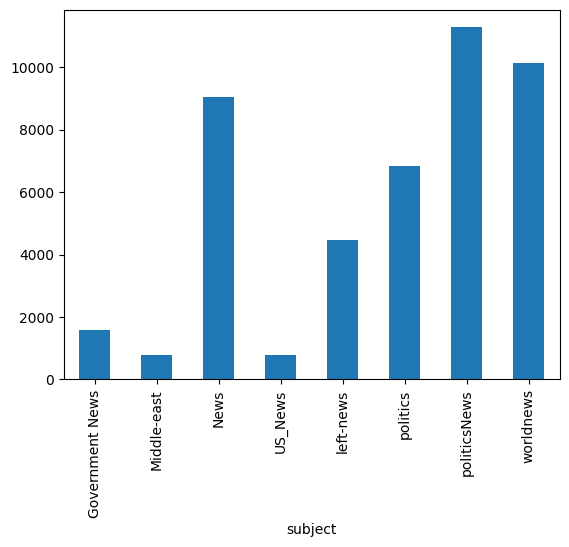

In [16]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()
     

target
fake    23481
true    21417
Name: text, dtype: int64


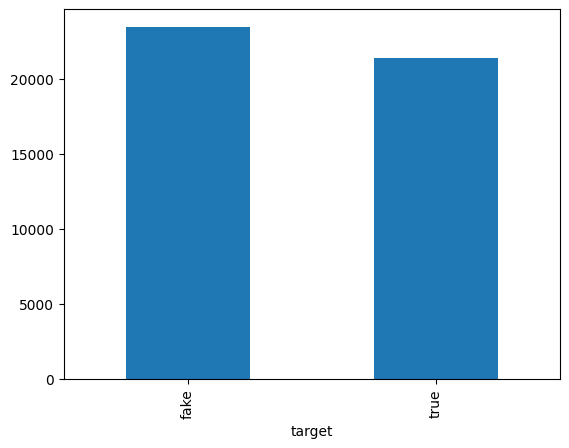

In [17]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

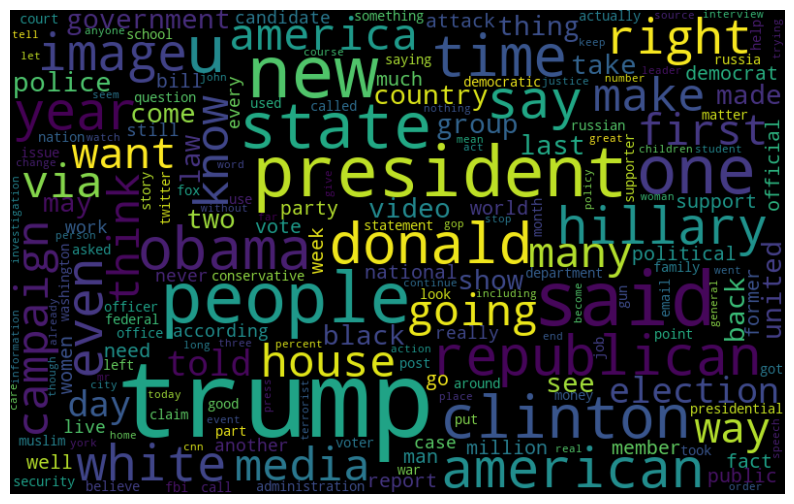

In [18]:
# Word cloud for fake news
#Wordcloud- visual representation of text data of the most frequently used words in a body of text.
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
#Combines all the text into one giant string.
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

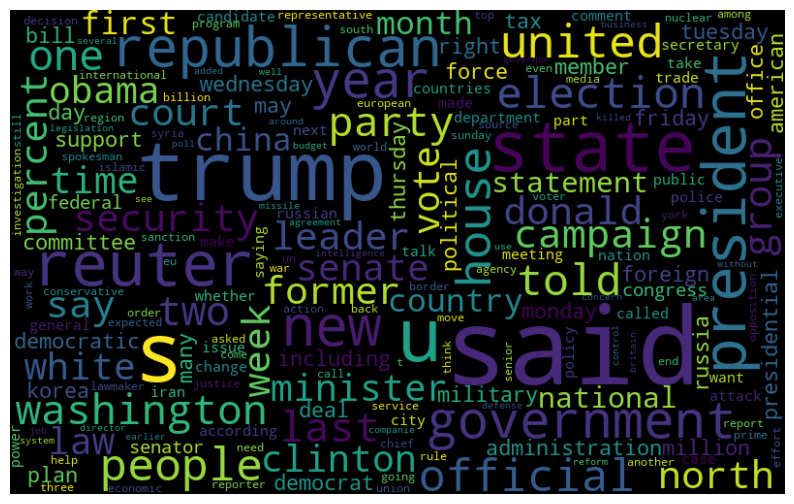

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# text frequency analysis 

#tokenization
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    #Tokenizes that string into words
    token_phrase = token_space.tokenize(all_words)
    #Uses FreqDist to count how often each word appears
    frequency = nltk.FreqDist(token_phrase)
    
    #Creates a DataFrame of top words and Picks the top N most frequent words
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    # Plots the result
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

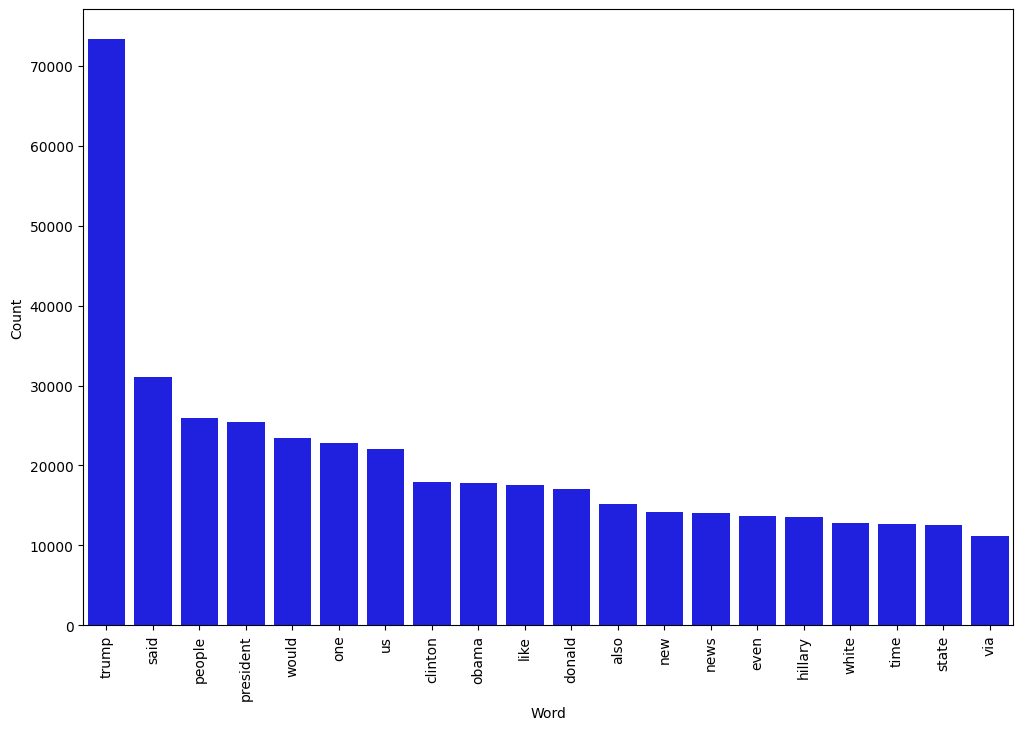

In [21]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

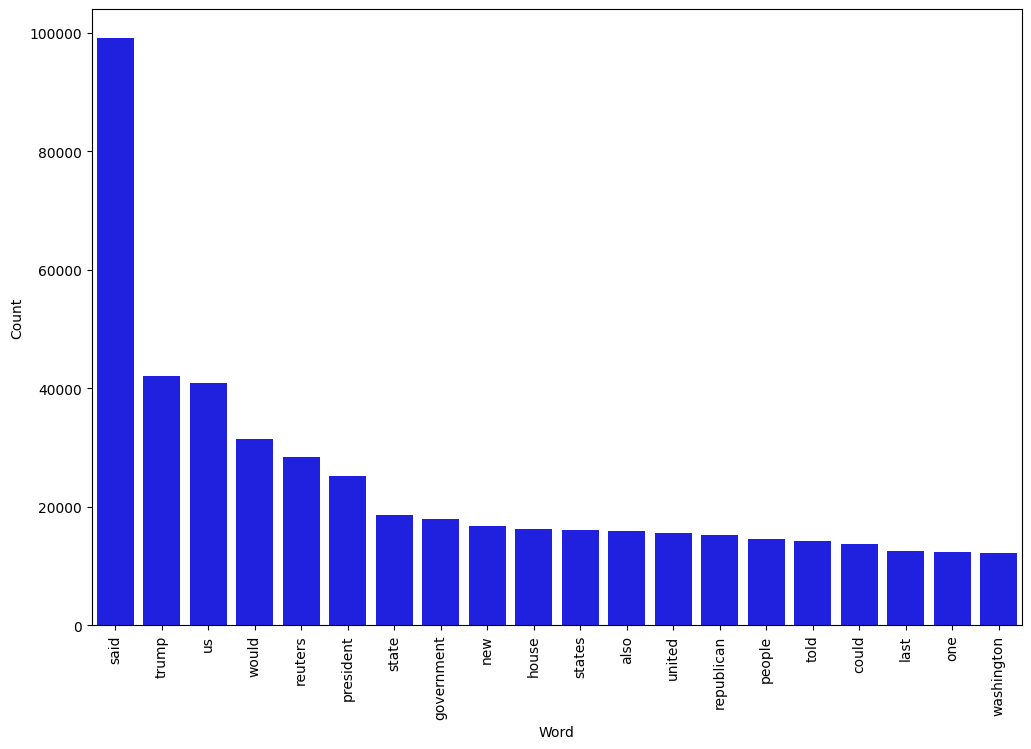

In [22]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [23]:
# Function to plot the confusion matrix (performance of a classification model- true positive, true negative, false positive
#false negative cases)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
# Split the data
# test it on unseen data: X_test and y_test
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)
     

In [25]:
#Logistic Regression
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 #It calculates the probability of each class and picks the most likely
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.88%


Confusion matrix, without normalization


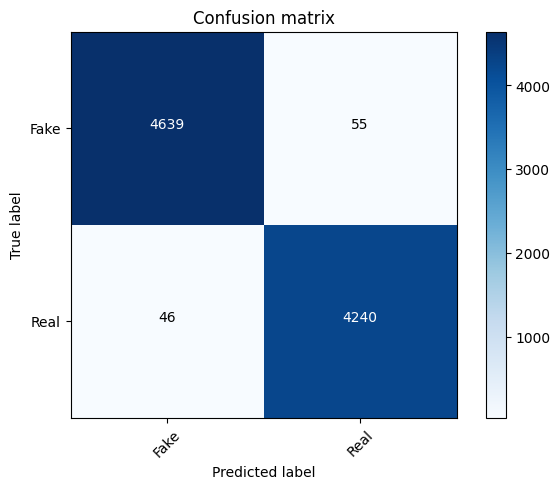

In [26]:
#visualizing model's performance
#Compares true labels (y_test) with  model’s predictions
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


In [27]:
#decision tree(shows the possible outcomes of a series of decisions)
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.68%


Confusion matrix, without normalization


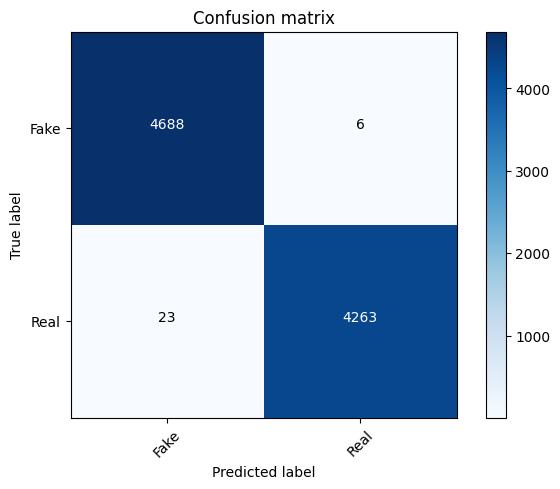

In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [29]:
#random forest: builds many decision trees and combines their predictions to make a final prediction
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.04%


Confusion matrix, without normalization


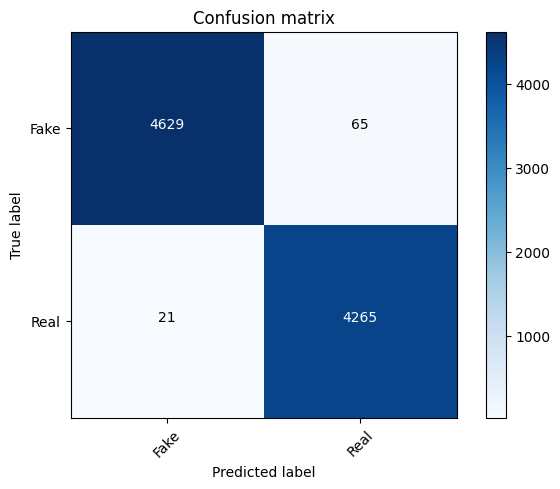

In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Random Forest is the most accurate and balanced model.

Logistic Regression is still a solid, simple baseline.

Decision Tree is okay, but less reliable for this task.

